# 2.1.8 Challenge: Preparing a dataset for modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats

## Dataset information

1. Title: Bank Marketing

2. Sources
   Original Owners of Database: 

    Marine Resources Division,
    Marine Research Laboratories - Taroona,
    Department of Primary Industry and Fisheries, Tasmania 


4. Relevant Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 


5. Number of Instances: 4177

6. Number of Attributes: 9


### Input variables:

#### Name / Data Type / Measurement Unit / Description 
----------------------------- 
1. Sex / nominal / -- / M, F, and I (infant) 
2. Length / continuous / mm / Longest shell measurement 
3. Diameter	/ continuous / mm / perpendicular to length 
4. Height / continuous / mm / with meat in shell 
5. Whole weight / continuous / grams / whole abalone 
6. Shucked weight / continuous	/ grams / weight of meat 
7. Viscera weight / continuous / grams / gut weight (after bleeding) 
8. Shell weight / continuous / grams / after being dried 

### Output variable (desired target):

9. Rings / integer / -- / +1.5 gives the age in years 


### Basis for features variables:

1. Sex / nominal / -- / M, F, and I (infant) 
2. Length / continuous / mm / Longest shell measurement 
3. Diameter	/ continuous / mm / perpendicular to length 
4. Whole weight / continuous / grams / whole abalone 
5. Shucked weight / continuous	/ grams / weight of meat 
6. Shell weight / continuous / grams / after being dried 


## Exploring the data

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df.head(10)

,sex,length,diameter,height,whole,shucked,viscera,shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
df.shape

(4177, 9)

In [5]:
# Subset of data
df2 = df.loc[:, ['rings', 'sex', 'length', 'diameter', 'whole', 'shucked', 'shell']]

In [6]:
df2.head(10)

,rings,sex,length,diameter,whole,shucked,shell
0,15,M,0.455,0.365,0.5140,0.2245,0.150
1,7,M,0.350,0.265,0.2255,0.0995,0.070
2,9,F,0.530,0.420,0.6770,0.2565,0.210
3,10,M,0.440,0.365,0.5160,0.2155,0.155
4,7,I,0.330,0.255,0.2050,0.0895,0.055
5,8,I,0.425,0.300,0.3515,0.1410,0.120
6,20,F,0.530,0.415,0.7775,0.2370,0.330
7,16,F,0.545,0.425,0.7680,0.2940,0.260
8,9,M,0.475,0.370,0.5095,0.2165,0.165
9,19,F,0.550,0.440,0.8945,0.3145,0.320


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
rings       4177 non-null int64
sex         4177 non-null object
length      4177 non-null float64
diameter    4177 non-null float64
whole       4177 non-null float64
shucked     4177 non-null float64
shell       4177 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 228.5+ KB


In [8]:
# Converting integers to float
df2['rings'] = df2.rings.astype(float)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
rings       4177 non-null float64
sex         4177 non-null object
length      4177 non-null float64
diameter    4177 non-null float64
whole       4177 non-null float64
shucked     4177 non-null float64
shell       4177 non-null float64
dtypes: float64(6), object(1)
memory usage: 228.5+ KB


In [10]:
df2.describe()

,rings,length,diameter,whole,shucked,shell
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,9.933684,0.523992,0.407881,0.828742,0.359367,0.238831
std,3.224169,0.120093,0.099240,0.490389,0.221963,0.139203
min,1.000000,0.075000,0.055000,0.002000,0.001000,0.001500
25%,8.000000,0.450000,0.350000,0.441500,0.186000,0.130000
50%,9.000000,0.545000,0.425000,0.799500,0.336000,0.234000
75%,11.000000,0.615000,0.480000,1.153000,0.502000,0.329000
max,29.000000,0.815000,0.650000,2.825500,1.488000,1.005000


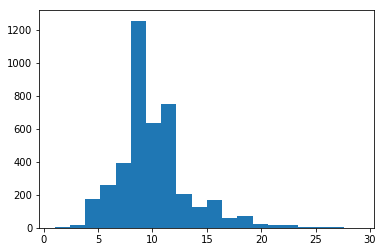

In [11]:
plt.hist(df2['rings'], bins=20)
plt.show()

Right-normal distribution.

#### Continuous and categorical variables

In [12]:
# Unique() values
for col in df2.columns:
    print('There are {} unique variables for {}.'.format((len(df[col].unique())), col))

There are 28 unique variables for rings.
There are 3 unique variables for sex.
There are 134 unique variables for length.
There are 111 unique variables for diameter.
There are 2429 unique variables for whole.
There are 1515 unique variables for shucked.
There are 926 unique variables for shell.


Sex is the only categorical variable.

### Examining continuous variables

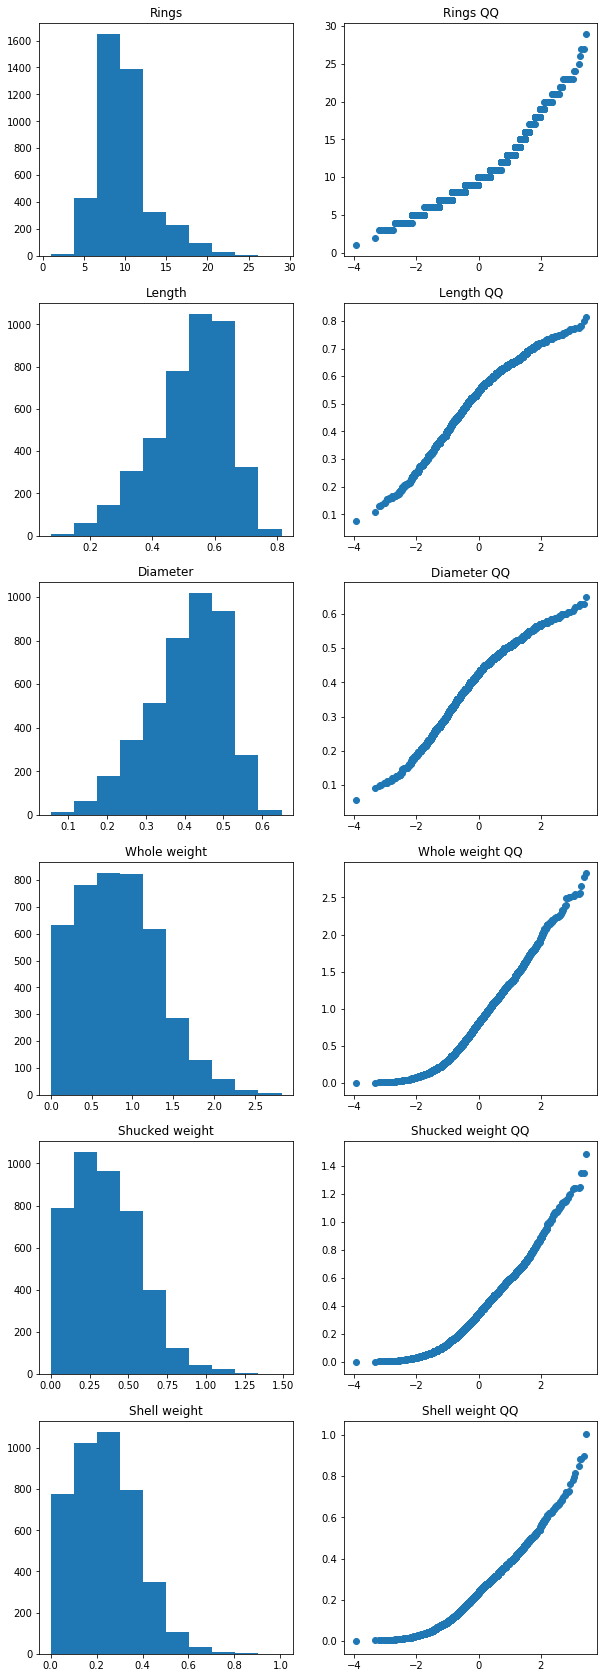

In [23]:
f, ax = plt.subplots(figsize=(10,30))
norm = sorted(np.random.normal(0,1,4177))

plt.subplot(6,2,1)
plt.hist(df2['rings'])
plt.title('Rings')

plt.subplot(6,2,2)
plt.scatter(norm, sorted(df2.rings))
plt.title('Rings QQ')

plt.subplot(6,2,3)
plt.hist(df2['length'])
plt.title('Length')

plt.subplot(6,2,4)
plt.scatter(norm, sorted(df2.length))
plt.title('Length QQ')

plt.subplot(6,2,5)
plt.hist(df2['diameter'])
plt.title('Diameter')

plt.subplot(6,2,6)
plt.scatter(norm, sorted(df2.diameter))
plt.title('Diameter QQ')

plt.subplot(6,2,7)
plt.hist(df2['whole'])
plt.title('Whole weight')

plt.subplot(6,2,8)
plt.scatter(norm, sorted(df2.whole))
plt.title('Whole weight QQ')

plt.subplot(6,2,9)
plt.hist(df2['shucked'])
plt.title('Shucked weight')

plt.subplot(6,2,10)
plt.scatter(norm, sorted(df2.shucked))
plt.title('Shucked weight QQ')

plt.subplot(6,2,11)
plt.hist(df2['shell'])
plt.title('Shell weight')

plt.subplot(6,2,12)
plt.scatter(norm, sorted(df2.shell))
plt.title('Shell weight QQ')

ccplt.show()

Uniform, in some cases right skew distributions. The QQ plots show that the distributions are non-nominal.

In [27]:
# Subset of data with continuous variables only.
cont = df2.loc[:, ['rings', 'length', 'diameter', 'whole', 'shucked', 'shell']]

In [28]:
# Make the scatterplot matrix
# Set the default plot aesthetics
sns.set_style('white')
# Create a data frame of random noise

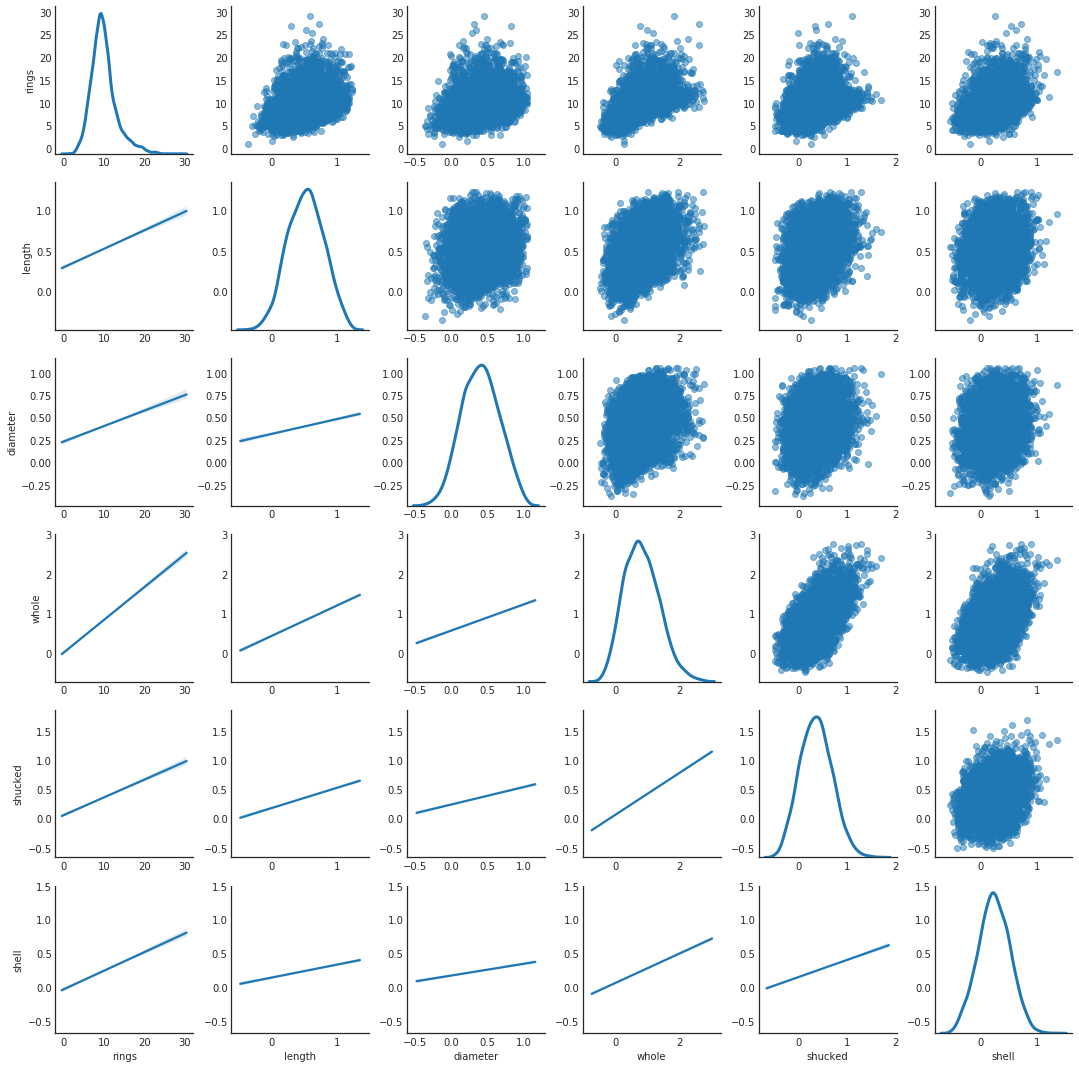

In [30]:
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(cont.shape)),
    columns = cont.columns
)

# Combine the data and the noise.
cont = cont.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(cont.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

             rings    length  diameter     whole   shucked     shell
rings     1.000000  0.268900  0.213429  0.488362  0.294426  0.315195
length    0.268900  1.000000  0.175097  0.386291  0.286020  0.186934
diameter  0.213429  0.175097  1.000000  0.312687  0.232039  0.159736
whole     0.488362  0.386291  0.312687  1.000000  0.590607  0.424208
shucked   0.294426  0.286020  0.232039  0.590607  1.000000  0.298458
shell     0.315195  0.186934  0.159736  0.424208  0.298458  1.000000


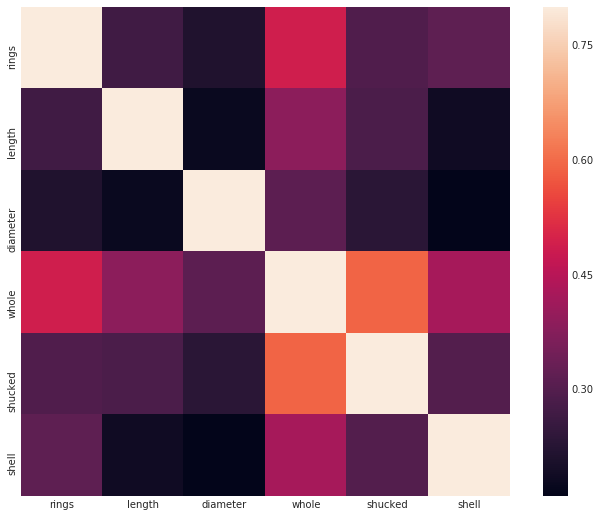

In [31]:
# Make the correlation matrix.
corrmat = cont.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize = (12,9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [32]:
df2.sex.unique()

array(['M', 'F', 'I'], dtype=object)

Shucked and whole weights have the highest correlation in this data frame, whereas the other variables are less correlated. Whole weight is the variable with the highest correlation reffered to our output variable, rings.

#### Examining continuous vs. categorical variables

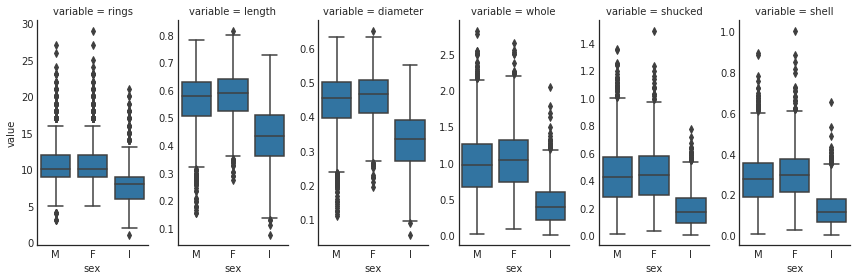

    diameter                                                        length  \
       count      mean       std    min    25%    50%    75%   max   count   
sex                                                                          
F     1307.0  0.454732  0.070954  0.195  0.410  0.465  0.505  0.65  1307.0   
I     1342.0  0.326494  0.088109  0.055  0.270  0.335  0.390  0.55  1342.0   
M     1528.0  0.439287  0.084398  0.110  0.395  0.455  0.500  0.63  1528.0   

                ...     shucked           whole                              \
         mean   ...         75%     max   count      mean       std     min   
sex             ...                                                           
F    0.579093   ...    0.573250  1.4880  1307.0  1.046532  0.430316  0.0800   
I    0.427746   ...    0.270375  0.7735  1342.0  0.431363  0.286275  0.0020   
M    0.561391   ...    0.566000  1.3510  1528.0  0.991459  0.470581  0.0155   

                                          
          25%

In [34]:
# Plot all the variables with boxplots for each league.

# Restructure the data so we can use FacetGrid rather an making a boxplot for each variable seperately.
df_long = df2
df_long = pd.melt(df_long, id_vars=['sex'])

g = sns.FacetGrid(df_long, col='variable', size = 4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, 'sex', 'value')
plt.show()

# Descriptive statistics by group.
print(df2.groupby('sex').describe())

# Test whether group differences are significant.
for col in df2.loc[:, ['rings', 'length', 'diameter', 'whole', 'shucked', 'shell']].columns:
    print(col)
    print(stats.ttest_ind(
        df2[df2['sex'] == 'F'][col].dropna(),
        df2[df2['sex'] == 'M'][col].dropna(),
    ))

We can see that all variables have outliers respect to their sex. Regarding the t-test we see that there are differences between male and female shells respect to their length, diameter and shell weight.

### Feature selection

In [36]:
# Converting sex into indicator dummy variables.
# Also creating a data frame to hold our features.

features = pd.get_dummies(df2['sex'])

In [37]:
# Adding rings to features in data frame
features['rings'] = df2['rings']

In [38]:
# Highest correlated variables (whole and shucked weights)
means = df2[['whole', 'shucked']].mean(axis=0)
stds = df2[['whole', 'shucked']].std(axis=0)
features['whole_shucked'] = ((df2[['whole', 'shucked']] - means) / stds).mean(axis=1)

In [40]:
# Check how well the composite correlates with the variables.
plotdf = df2.loc[:, ['whole','shucked']]
plotdf['whole_shucked'] = features ['whole_shucked']
corrmat2 = plotdf.corr()

print(corrmat2)

                  whole   shucked  whole_shucked
whole          1.000000  0.969405       0.992322
shucked        0.969405  1.000000       0.992322
whole_shucked  0.992322  0.992322       1.000000


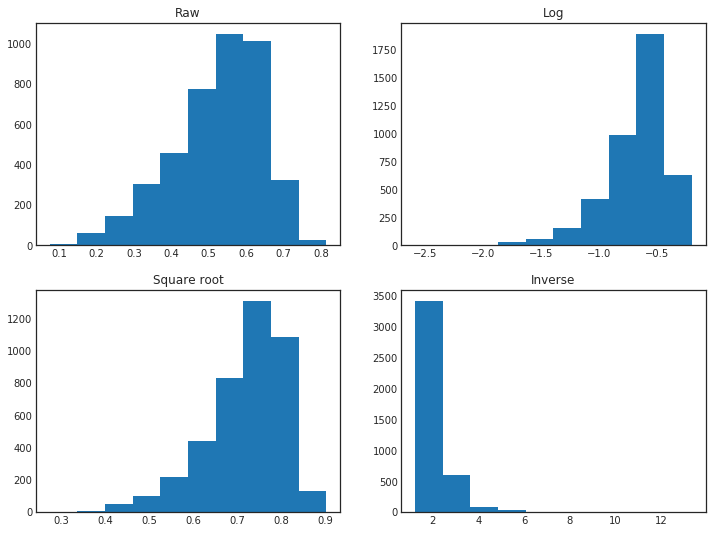

In [53]:
# Dealing with non-normality.

# Make a four-panel plot
# Distribution for length variable
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['length'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['length'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['length'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df2['length'].dropna())
plt.title('Inverse')

plt.show()

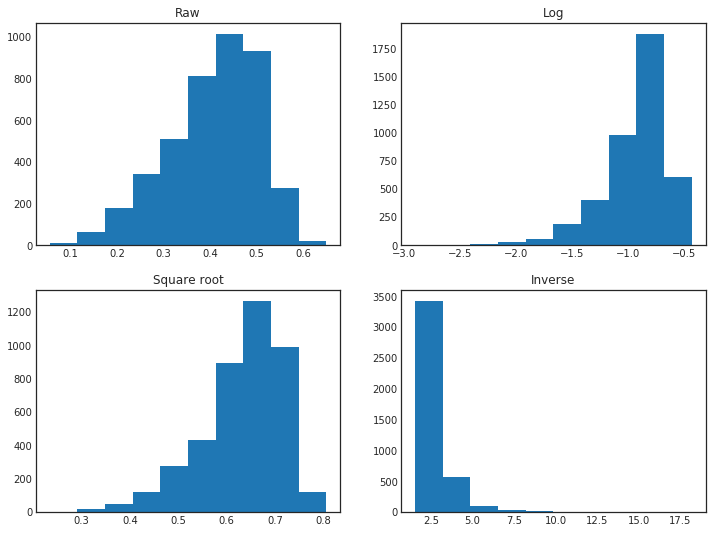

In [57]:
# Dealing with non-normality.

# Make a four-panel plot
# Distribution for diameter variable
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['diameter'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['diameter'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['diameter'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df2['diameter'].dropna())
plt.title('Inverse')
plt.show()

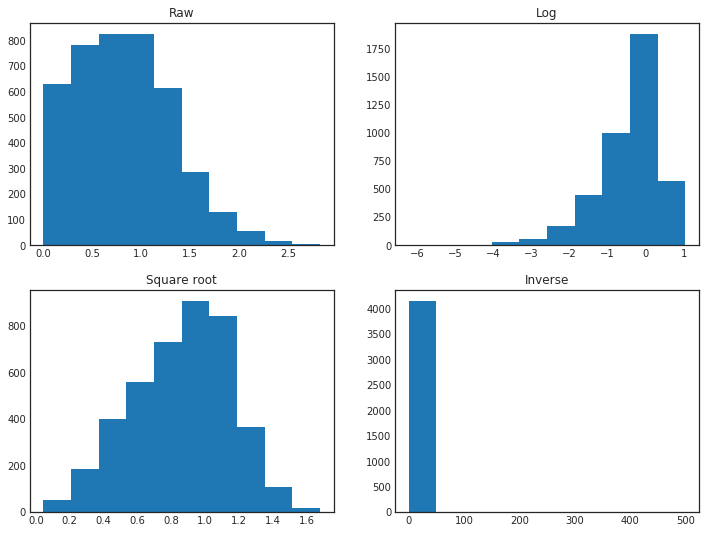

In [56]:
# Dealing with non-normality.

# Make a four-panel plot
# Distribution for whole weight variable
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['whole'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['whole'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['whole'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df2['whole'].dropna())
plt.title('Inverse')
plt.show()

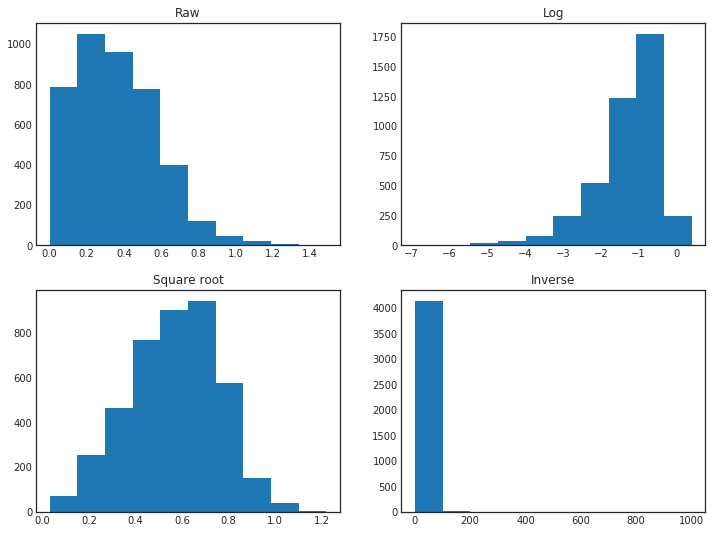

In [55]:
# Dealing with non-normality.

# Make a four-panel plot
# Distribution for shucked weight variable
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['shucked'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['shucked'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['shucked'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df2['shucked'].dropna())
plt.title('Inverse')
plt.show()

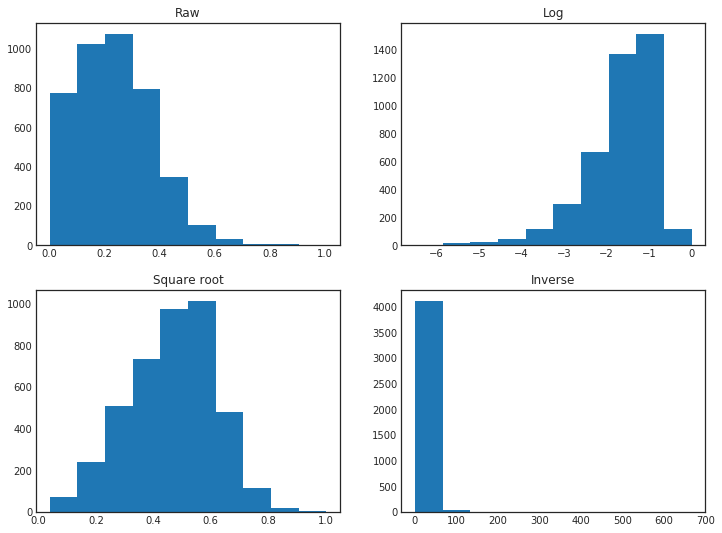

In [54]:
# Dealing with non-normality.

# Make a four-panel plot
# Distribution for shell weight variable
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['shell'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['shell'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['shell'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df2['shell'].dropna())
plt.title('Inverse')
plt.show()